<a href="https://colab.research.google.com/github/gomezphd/CAI2300C_NLP/blob/main/NLP_Assignment_3_AI_Powered_Mental_Health_Diagnostics_Recommender_%26_Classifier_For_Mental_Health_Diagnostics_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MDC 2300C: Introduction to Natural Language Processing**

## **Assignment 3**: # **AI-Powered Mental Health Diagnostics: Recommender & Classifier**



---


**Student**: Carlos C Gomez

**Date**: March 2025

**Professor**: Dr. Ernesto Lee  

---



# **MDC 2300C: Introduction to Natural Language Processing**

## **Assignment 3**: AI-Powered Mental Health Diagnostics: Recommender & Classifier

---

**Student**: Carlos C Gomez  
**Date**: March 2025  
**Professor**: Dr. Ernesto Lee

---

# **AI-Powered Mental Health Diagnostics: Recommender & Classifier**

## **Introduction**

Mental health diagnosis is complex, often requiring expert assessment of symptom patterns. This project explores how **machine learning and text embeddings** can enhance mental health diagnostics by:

- **Matching symptoms to relevant conditions** (Recommender System)
- **Classifying symptoms into diagnostic categories** (Classifier)
- **Optimizing retrieval using a vector database** (ChromaDB Integration)

By leveraging OpenAI's **text-embedding-3-small** model, we transform clinical descriptions into high-dimensional vector representations, allowing AI-assisted recommendations and automated classification of mental health conditions.

## **Key Features**

- **ICD-10 Integration** – Structured mental health conditions based on ICD-10 codes
- **AI-Powered Symptom Matching** – Finding similar diagnoses based on descriptions
- **Automated Classification** – Categorizing conditions into mood, anxiety, or trauma-related disorders
- **Treatment Guidance** – Recommending therapy and pharmacological options
- **Vector Database for Efficiency** – ChromaDB for real-time similarity search

## **Methodology**

This system follows a structured, multi-step approach:

1. **Environment Setup** – Install dependencies, configure API access, and define helper functions
2. **Data Preparation** – Create a structured dataset of 30 mental health conditions with symptoms and recommended treatments
3. **Embedding Generation** – Convert text-based symptoms into 1536-dimensional embeddings using OpenAI's model
4. **Recommender System** – Match input symptoms to similar conditions based on cosine similarity
5. **Classifier Development** – Predict diagnostic category and severity using embedding-based machine learning
6. **Vector Database Integration** – Store embeddings in ChromaDB for fast and scalable retrieval
7. **Performance Evaluation** – Assess model accuracy using precision, recall, and similarity metrics
8. **User Interface** – Develop an interactive Gradio app for real-time mental health diagnostics

Each step builds toward an AI-powered diagnostic system that enhances accessibility and efficiency in mental health assessment.

### Educational Purpose

This tool is designed for **educational purposes only** and demonstrates how natural language processing can support mental health professionals in the diagnostic process. It is not intended for clinical use without professional medical judgment and expertise.

---
# **Environment Setup**

To begin, we need to configure our Python environment with the necessary dependencies and ensure secure API access for the OpenAI embedding model. This section outlines the key setup steps:

### **1. Fetch API Key**

The OpenAI API key is retrieved from Google Colab's secure storage to enable access to the `text-embedding-3-small` model.

In [ ]:
# Set OpenAI API key from Colab secrets
from google.colab import userdata
from openai import OpenAI

print("OpenAI API Configuration")

# Get API key from Colab secrets
api_key = userdata.get('OpenAI')  # Get API key from Colab secrets

# Configure OpenAI client
client = OpenAI(api_key=api_key)

# Test API connection with a simple embedding request
try:
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input="Test connection to OpenAI API"
    )
    print("✅ OpenAI API connection successful!")

    # Get embedding dimension
    embedding_dimension = len(response.data[0].embedding)
    print(f"✅ Embedding dimension: {embedding_dimension}")

except Exception as e:
    print(f"❌ Error connecting to OpenAI API: {e}")
    print

OpenAI API Configuration
✅ OpenAI API connection successful!
✅ Embedding dimension: 1536


---

### **2. Install Required Libraries**


We install the necessary Python libraries, including OpenAI for embeddings, scikit-learn for similarity calculations, and matplotlib for data visualization.

In [ ]:
# Important clinical disclaimer

print("*" * 72)
print("IMPORTANT: This analysis is provided for educational purposes only.")
print("Clinical decision-making should rely on comprehensive assessment by qualified")
print("healthcare professionals following evidence-based practice guidelines.")
print("*" * 72)

print("Environment Setup\n")


# Install required packages
!pip install openai numpy pandas scikit-learn matplotlib chromadb gradio -q

print("✅ Required packages installed successfully.")


************************************************************************
IMPORTANT: This analysis is provided for educational purposes only.
Clinical decision-making should rely on comprehensive assessment by qualified
healthcare professionals following evidence-based practice guidelines.
************************************************************************
Environment Setup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.2 MB/s eta 0:00:00
   ━

---

### **3. Import Dependencies**
Once installed, we import the required libraries.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import time
import warnings
warnings.filterwarnings('ignore')





✅ Environment Setup Complete


---
### **4. Define Helper Functions**

These utility functions will help us generate embeddings, compute similarity, and find related items.


In [16]:
# Helper functions for formatting output
def print_section(title, char="="):
    """Print a formatted section title"""
    border = char * 80
    print(f"\n{border}\n{title}\n{border}")

print_section("Helper Functions for Embeddings and Similarity")

def create_embedding(text, model="text-embedding-3-small"):
    """
    Create an embedding for a single text using OpenAI API.

    Args:
        text (str): Text to embed
        model (str): OpenAI embedding model name

    Returns:
        list: Embedding vector
    """
    try:
        response = client.embeddings.create(
            model=model,
            input=text
        )
        return response.data[0].embedding
    except Exception as e:
        print(f"Error generating embedding: {e}")
        return None

def create_embeddings_batch(texts, model="text-embedding-3-small", batch_size=25):
    """
    Create embeddings for a list of texts using OpenAI API with batching.

    Args:
        texts (list): List of text strings to embed
        model (str): OpenAI embedding model name
        batch_size (int): Number of texts to process in each batch

    Returns:
        list: List of embedding vectors
    """
    embeddings = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:min(i+batch_size, len(texts))]
        try:
            print(f"Processing batch {i//batch_size + 1}/{(len(texts)-1)//batch_size + 1}...")
            response = client.embeddings.create(
                model=model,
                input=batch
            )
            batch_embeddings = [data.embedding for data in response.data]
            embeddings.extend(batch_embeddings)

            # Sleep to avoid rate limits if needed
            if i + batch_size < len(texts):
                time.sleep(0.5)

        except Exception as e:
            print(f"Error generating embeddings for batch {i//batch_size + 1}: {e}")
            # Return partial embeddings up to the error
            return embeddings

    return embeddings

def compute_similarity(embedding1, embedding2):
    """
    Compute cosine similarity between two embeddings.

    Args:
        embedding1 (list): First embedding vector
        embedding2 (list): Second embedding vector

    Returns:
        float: Cosine similarity score (0-1)
    """
    return cosine_similarity([embedding1], [embedding2])[0][0]

def find_similar_items(query_embedding, item_embeddings, items, top_n=3):
    """
    Find the most similar items to a query embedding.

    Args:
        query_embedding (list): Query embedding vector
        item_embeddings (list): List of item embedding vectors
        items (list): List of original items
        top_n (int): Number of results to return

    Returns:
        list: Top N matching items with similarity scores
    """
    similarities = [compute_similarity(query_embedding, item_embedding)
                  for item_embedding in item_embeddings]

    # Create (index, similarity) pairs and sort by similarity (descending)
    similarity_pairs = list(enumerate(similarities))
    similarity_pairs.sort(key=lambda x: x[1], reverse=True)

    # Get top N results
    top_pairs = similarity_pairs[:top_n]

    # Format results
    results = []
    for idx, score in top_pairs:
        results.append({
            "item": items[idx],
            "similarity_score": score
        })

    return results

print("Helper functions defined for:")
print("✅ Creating individual embeddings (create_embedding)")
print("✅ Batch processing for multiple texts (create_embeddings_batch)")
print("✅ Computing similarity between embeddings (compute_similarity)")
print("✅ Finding the most similar items to a query (find_similar_items)")


Helper Functions for Embeddings and Similarity
Helper functions defined for:
✅ Creating individual embeddings (create_embedding)
✅ Batch processing for multiple texts (create_embeddings_batch)
✅ Computing similarity between embeddings (compute_similarity)
✅ Finding the most similar items to a query (find_similar_items)


---

# **Data Preparation:** Creating a Synthetic Mental Health Conditions Dataset

## **Why a Synthetic Dataset?**

To develop an effective embeddings-based recommendation and classification system, we need structured data that reflects real-world mental health conditions. Using ICD-10 diagnostic codes, we simulate a dataset that includes:
- Common mental health diagnoses
- Symptom descriptions
- Severity levels (Mild, Moderate, Severe)
- Evidence-based treatment recommendations

This dataset provides a foundation for **semantic search and classification** in mental health diagnostics.

## **Dataset Overview**

Our dataset includes **30 mental health conditions**, each structured as follows:

- **ICD-10 Code**: Standardized diagnostic classification
- **Diagnosis**: Clinical name of the condition
- **Symptoms**: Key features of the disorder
- **Category**: Broader classification (e.g., Mood Disorders, Anxiety Disorders)
- **Severity**: Clinical severity level
- **Recommended Treatments**: Common evidence-based interventions


Creating Mental Health Conditions - Synthetic Dataset
Dataset created with 31 mental health conditions

Columns in the dataset: icd10_code, diagnosis, symptoms, category, severity, recommended_treatments

Category distribution:
- Anxiety Disorders: 5 conditions
- Mood Disorders: 4 conditions
- Trauma-Related Disorders: 4 conditions
- Obsessive-Compulsive and Related Disorders: 4 conditions
- Bipolar and Related Disorders: 2 conditions
- Feeding and Eating Disorders: 2 conditions
- Personality Disorders: 2 conditions
- Neurodevelopmental Disorders: 2 conditions
- Schizophrenia Spectrum Disorders: 1 conditions
- Sleep-Wake Disorders: 1 conditions
- Dissociative Disorders: 1 conditions
- Substance-Related Disorders: 1 conditions
- Somatic Symptom and Related Disorders: 1 conditions
- Disruptive, Impulse-Control, and Conduct Disorders: 1 conditions

Severity distribution:
- Moderate: 17 conditions
- Severe: 11 conditions
- Mild: 3 conditions

Sample entries (first 3):

-------------------

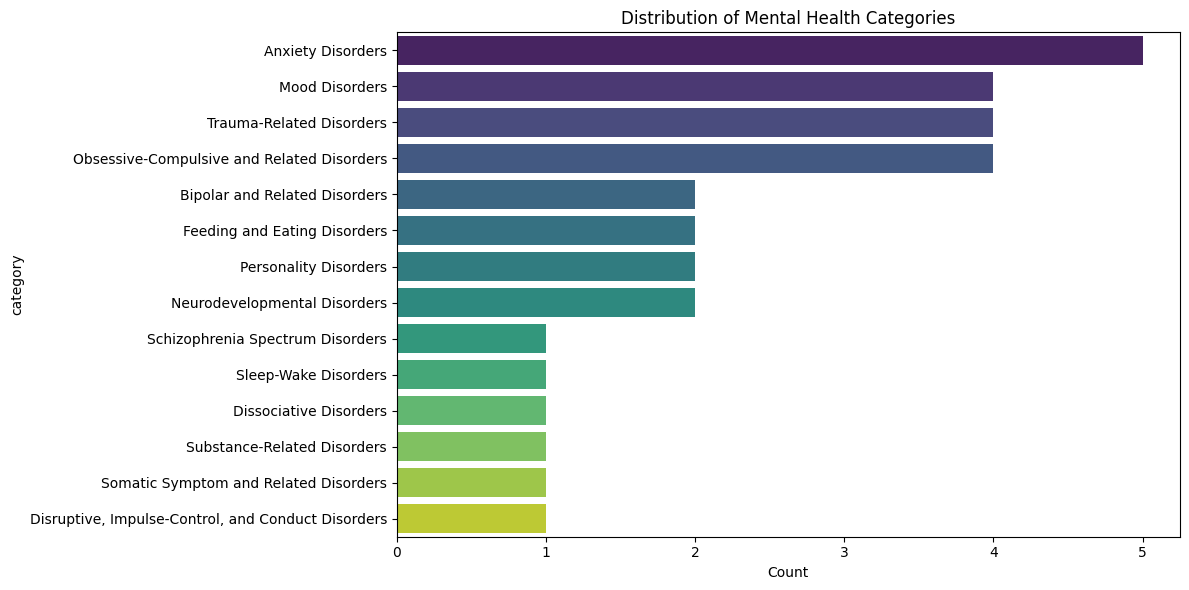

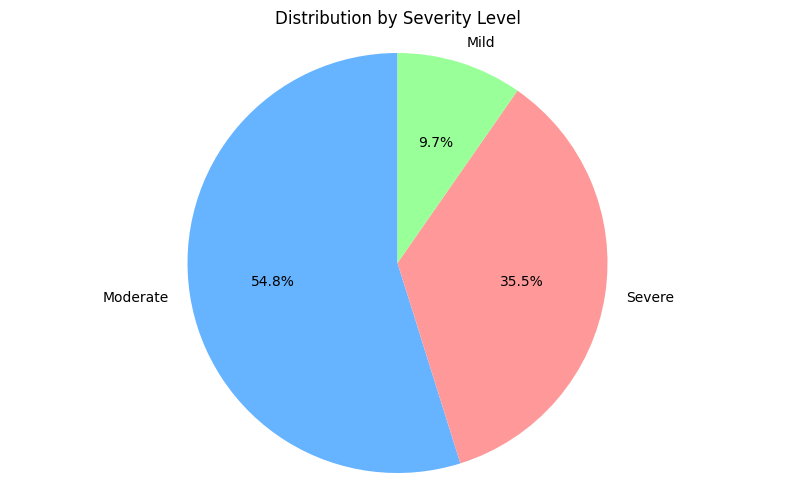

<Figure size 1400x800 with 0 Axes>

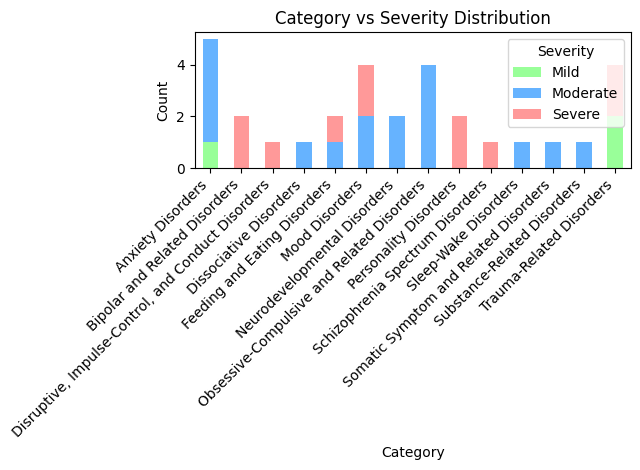

✅ Mental Health Conditions Dataset Created

********************************************************************************
IMPORTANT: This dataset is created for educational purposes only.
The symptom descriptions and treatment recommendations are simplified
and should not be used for actual clinical diagnosis or treatment planning.
********************************************************************************


In [17]:
print_section("Creating Mental Health Conditions - Synthetic Dataset")

# Create structured data based on ICD-10 mental health codes
mental_health_data = [
    {
        "icd10_code": "F32.1",
        "diagnosis": "Major depressive disorder, single episode, moderate",
        "symptoms": "Persistent sadness, loss of interest in previously enjoyed activities, sleep disturbances, reduced appetite, fatigue, feelings of worthlessness, and difficulty concentrating for at least 2 weeks. Symptoms cause moderate impairment in social and occupational functioning.",
        "category": "Mood Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy (CBT), Interpersonal Therapy (IPT), consider SSRI antidepressant medication, regular exercise, and sleep hygiene improvements."
    },
    {
        "icd10_code": "F41.1",
        "diagnosis": "Generalized Anxiety Disorder",
        "symptoms": "Excessive anxiety and worry about various events or activities occurring more days than not for at least 6 months. Difficulty controlling worry, restlessness, fatigue, difficulty concentrating, irritability, muscle tension, and sleep disturbance. Symptoms cause significant distress in social or occupational functioning.",
        "category": "Anxiety Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy (CBT), mindfulness-based interventions, SSRI or SNRI medication, relaxation techniques, and lifestyle modifications."
    },
    {
        "icd10_code": "F43.1",
        "diagnosis": "Post-Traumatic Stress Disorder",
        "symptoms": "Exposure to actual or threatened death, serious injury, or violence followed by intrusive memories, flashbacks, nightmares, psychological distress, physiological reactions to trauma cues, avoidance behaviors, negative alterations in cognition and mood, and heightened arousal and reactivity. Symptoms persist for more than one month and cause significant functional impairment.",
        "category": "Trauma-Related Disorders",
        "severity": "Severe",
        "recommended_treatments": "Trauma-Focused Cognitive Behavioral Therapy (TF-CBT), Eye Movement Desensitization and Reprocessing (EMDR), prolonged exposure therapy, and SSRI medication."
    },
    {
        "icd10_code": "F31.1",
        "diagnosis": "Bipolar I Disorder, current episode manic without psychotic features",
        "symptoms": "Distinct period of abnormally and persistently elevated, expansive, or irritable mood and abnormally and persistently increased activity or energy, lasting at least 1 week. Decreased need for sleep, more talkative than usual, flight of ideas, distractibility, increase in goal-directed activity, and excessive involvement in activities with high potential for painful consequences.",
        "category": "Bipolar and Related Disorders",
        "severity": "Severe",
        "recommended_treatments": "Mood stabilizers (lithium, valproate), atypical antipsychotics, psychoeducation, cognitive behavioral therapy, interpersonal and social rhythm therapy, and family-focused therapy."
    },
    {
        "icd10_code": "F42.2",
        "diagnosis": "Obsessive-Compulsive Disorder",
        "symptoms": "Presence of obsessions (recurrent and persistent thoughts, urges, or images) and/or compulsions (repetitive behaviors or mental acts) that are time-consuming, cause significant distress, and interfere with daily functioning. The person attempts to ignore or suppress obsessions or to neutralize them with compulsions.",
        "category": "Obsessive-Compulsive and Related Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Exposure and Response Prevention (ERP), Cognitive Behavioral Therapy (CBT), SSRI medication at higher doses than for depression, and mindfulness techniques."
    },
    {
        "icd10_code": "F20.0",
        "diagnosis": "Paranoid Schizophrenia",
        "symptoms": "Delusions of persecution, reference, or jealousy, often accompanied by auditory hallucinations. Abnormalities in thought process, disorganized speech, grossly disorganized behavior, and negative symptoms such as diminished emotional expression or avolition. Symptoms cause significant social and occupational dysfunction.",
        "category": "Schizophrenia Spectrum Disorders",
        "severity": "Severe",
        "recommended_treatments": "Atypical antipsychotic medication, psychosocial interventions, cognitive behavioral therapy for psychosis (CBTp), family education and support, and social skills training."
    },
    {
        "icd10_code": "F50.2",
        "diagnosis": "Bulimia Nervosa",
        "symptoms": "Recurrent episodes of binge eating followed by inappropriate compensatory behaviors (self-induced vomiting, laxative misuse, fasting, excessive exercise) to prevent weight gain. Self-evaluation unduly influenced by body shape and weight. Behaviors occur at least once a week for 3 months.",
        "category": "Feeding and Eating Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy for Bulimia (CBT-BN), Interpersonal Psychotherapy (IPT), nutritional counseling, SSRI medication, and family-based treatment for adolescents."
    },
    {
        "icd10_code": "F40.1",
        "diagnosis": "Social Anxiety Disorder",
        "symptoms": "Marked fear or anxiety about social situations in which the individual may be scrutinized by others. Fear of acting in a way that will be negatively evaluated. Social situations almost always provoke fear or anxiety and are avoided or endured with intense anxiety. Symptoms cause significant distress and impairment in functioning.",
        "category": "Anxiety Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy with exposure exercises, social skills training, group therapy, SSRI or SNRI medication, and self-help strategies."
    },
    {
        "icd10_code": "F60.3",
        "diagnosis": "Borderline Personality Disorder",
        "symptoms": "Pervasive pattern of instability in interpersonal relationships, self-image, and affects, as well as marked impulsivity. Frantic efforts to avoid abandonment, unstable relationships, identity disturbance, impulsivity, recurrent suicidal behavior or self-harm, emotional instability, chronic feelings of emptiness, inappropriate anger, and transient paranoid ideation.",
        "category": "Personality Disorders",
        "severity": "Severe",
        "recommended_treatments": "Dialectical Behavior Therapy (DBT), Mentalization-Based Therapy (MBT), Schema Therapy, Transference-Focused Psychotherapy (TFP), and symptom-targeted medication."
    },
    {
        "icd10_code": "F90.0",
        "diagnosis": "Attention-Deficit/Hyperactivity Disorder, predominantly inattentive presentation",
        "symptoms": "Persistent pattern of inattention that interferes with functioning or development. Fails to give close attention to details, difficulty sustaining attention, does not seem to listen, does not follow through on instructions, difficulty organizing tasks, avoids tasks requiring sustained mental effort, loses things, easily distracted, and forgetful in daily activities.",
        "category": "Neurodevelopmental Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Stimulant medication, non-stimulant medication (atomoxetine, guanfacine), behavioral therapy, parent training, educational interventions, and organizational skills training."
    },
    {
        "icd10_code": "F34.1",
        "diagnosis": "Persistent Depressive Disorder (Dysthymia)",
        "symptoms": "Depressed mood for most of the day, for more days than not, for at least 2 years. Presence of two or more of the following: poor appetite or overeating, insomnia or hypersomnia, low energy or fatigue, low self-esteem, poor concentration or difficulty making decisions, and feelings of hopelessness.",
        "category": "Mood Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy (CBT), Interpersonal Therapy (IPT), antidepressant medication (SSRI, SNRI), combined psychotherapy and pharmacotherapy, and behavioral activation."
    },
    {
        "icd10_code": "F43.21",
        "diagnosis": "Adjustment Disorder with depressed mood",
        "symptoms": "Emotional or behavioral symptoms developing in response to an identifiable stressor within 3 months of stressor onset. Symptoms include marked distress that is out of proportion to the severity of the stressor and significant impairment in social, occupational, or other important areas of functioning.",
        "category": "Trauma-Related Disorders",
        "severity": "Mild",
        "recommended_treatments": "Brief psychotherapy, solution-focused therapy, supportive counseling, stress management techniques, and lifestyle modifications."
    },
    {
        "icd10_code": "F51.01",
        "diagnosis": "Primary Insomnia",
        "symptoms": "Difficulty initiating or maintaining sleep, or nonrestorative sleep, for at least 3 months. The sleep disturbance causes significant distress or impairment in functioning. Occurs at least 3 nights per week despite adequate opportunity for sleep.",
        "category": "Sleep-Wake Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy for Insomnia (CBT-I), sleep hygiene education, relaxation training, stimulus control therapy, sleep restriction, and short-term use of sleep medications if necessary."
    },
    {
        "icd10_code": "F50.0",
        "diagnosis": "Anorexia Nervosa",
        "symptoms": "Restriction of energy intake leading to significantly low body weight, intense fear of gaining weight or becoming fat, and disturbance in the way one's body weight or shape is experienced. Persistent behavior that interferes with weight gain despite low weight.",
        "category": "Feeding and Eating Disorders",
        "severity": "Severe",
        "recommended_treatments": "Medical monitoring and restoration of healthy weight, nutritional rehabilitation, family-based treatment (FBT) for adolescents, Cognitive Behavioral Therapy for Anorexia (CBT-AN), and pharmacotherapy for comorbid conditions."
    },
    {
        "icd10_code": "F44.1",
        "diagnosis": "Dissociative Amnesia",
        "symptoms": "Inability to recall important autobiographical information, usually of a traumatic or stressful nature, inconsistent with ordinary forgetting. Not attributable to the physiological effects of a substance or neurological condition.",
        "category": "Dissociative Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Psychotherapy focused on processing traumatic memories, hypnotherapy, cognitive behavioral techniques, and pharmacotherapy for comorbid anxiety or depression."
    },
    {
        "icd10_code": "F10.20",
        "diagnosis": "Alcohol Use Disorder, moderate",
        "symptoms": "Problematic pattern of alcohol use leading to clinically significant impairment, manifested by at least 4 symptoms: alcohol taken in larger amounts than intended, persistent desire to cut down, great deal of time spent obtaining alcohol, craving, failure to fulfill major role obligations, continued use despite social problems, giving up important activities, recurrent use in hazardous situations, continued use despite physical or psychological problems, tolerance, and withdrawal.",
        "category": "Substance-Related Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Motivational interviewing, cognitive behavioral therapy, mutual support groups (AA), consideration of medication (naltrexone, acamprosate), and treatment of co-occurring disorders."
    },
    {
        "icd10_code": "F41.0",
        "diagnosis": "Panic Disorder without Agoraphobia",
        "symptoms": "Recurrent unexpected panic attacks followed by at least one month of persistent concern about additional attacks, worry about the implications of the attacks, or significant change in behavior related to the attacks. Panic attacks involve intense fear with physical symptoms such as heart palpitations, sweating, trembling, shortness of breath, choking sensations, chest pain, nausea, dizziness, chills or hot flashes, and fear of dying.",
        "category": "Anxiety Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy (CBT), panic-focused interventions, exposure techniques, relaxation training, SSRI or SNRI medication, and education about the nature of panic."
    },
    {
        "icd10_code": "F45.1",
        "diagnosis": "Somatic Symptom Disorder",
        "symptoms": "One or more somatic symptoms that are distressing and result in significant disruption of daily life. Excessive thoughts, feelings, or behaviors related to the somatic symptoms as manifested by disproportionate and persistent thoughts about the seriousness of symptoms, persistently high anxiety about symptoms, or excessive time and energy devoted to symptoms.",
        "category": "Somatic Symptom and Related Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy, mindfulness-based approaches, regular scheduled visits with a primary care provider, antidepressant medication for comorbid anxiety/depression, and physical therapy or graded exercise programs."
    },
    {
        "icd10_code": "F84.0",
        "diagnosis": "Autism Spectrum Disorder",
        "symptoms": "Persistent deficits in social communication and social interaction across multiple contexts, restricted, repetitive patterns of behavior, interests, or activities. Symptoms present in the early developmental period and cause clinically significant impairment in social, occupational, or other important areas of functioning.",
        "category": "Neurodevelopmental Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Applied Behavior Analysis (ABA), social skills training, speech-language therapy, occupational therapy, educational supports, and pharmacotherapy for specific symptoms (irritability, attention problems)."
    },
    {
        "icd10_code": "F31.6",
        "diagnosis": "Bipolar I Disorder, current episode mixed",
        "symptoms": "Symptoms that meet criteria for both a manic episode and a major depressive episode nearly every day during at least a 1-week period. Rapid alternation between manic and depressive symptoms with prominent irritability, anxiety, and potentially suicidal ideation alongside increased energy and racing thoughts.",
        "category": "Bipolar and Related Disorders",
        "severity": "Severe",
        "recommended_treatments": "Combination of mood stabilizers and antipsychotics, close monitoring for suicidality, hospitalization if necessary, intensive psychotherapy, and family psychoeducation."
    },
    {
        "icd10_code": "F33.2",
        "diagnosis": "Major Depressive Disorder, recurrent, severe without psychotic features",
        "symptoms": "Multiple episodes of major depression with severe symptoms including marked loss of interest in almost all activities, significant weight loss when not dieting, insomnia or hypersomnia nearly every day, psychomotor agitation or retardation, fatigue, feelings of worthlessness or excessive guilt, diminished ability to think or concentrate, and recurrent thoughts of death. Symptoms cause severe impairment in functioning.",
        "category": "Mood Disorders",
        "severity": "Severe",
        "recommended_treatments": "Combination of psychotherapy and pharmacotherapy, possible consideration of electroconvulsive therapy (ECT) if medication resistant, intensive outpatient program or partial hospitalization, and suicide risk monitoring."
    },
    {
        "icd10_code": "F40.2",
        "diagnosis": "Specific Phobia",
        "symptoms": "Marked fear or anxiety about a specific object or situation (e.g., flying, heights, animals, receiving an injection, seeing blood). The feared object or situation almost always provokes immediate fear or anxiety and is actively avoided. The fear is out of proportion to the actual danger posed and causes significant distress or functional impairment.",
        "category": "Anxiety Disorders",
        "severity": "Mild",
        "recommended_treatments": "Exposure therapy, cognitive restructuring, systematic desensitization, virtual reality exposure for certain phobias, and relaxation techniques."
    },
    {
        "icd10_code": "F60.2",
        "diagnosis": "Antisocial Personality Disorder",
        "symptoms": "Pervasive pattern of disregard for and violation of the rights of others occurring since age 15. Failure to conform to social norms, deceitfulness, impulsivity, irritability and aggressiveness, reckless disregard for safety of self or others, consistent irresponsibility, and lack of remorse.",
        "category": "Personality Disorders",
        "severity": "Severe",
        "recommended_treatments": "Cognitive Behavioral Therapy, schema therapy, contingency management, community reinforcement approach for co-occurring substance use, treatment of comorbid conditions, and consideration of legal mandated treatment."
    },
    {
        "icd10_code": "F42.3",
        "diagnosis": "Hoarding Disorder",
        "symptoms": "Persistent difficulty discarding or parting with possessions, regardless of their actual value, due to perceived need to save items and distress associated with discarding. The difficulty discarding possessions results in the accumulation of possessions that congest and clutter active living areas and substantially compromises their intended use. Symptoms cause clinically significant distress or impairment in functioning.",
        "category": "Obsessive-Compulsive and Related Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy specialized for hoarding, motivational interviewing, skills training for organization and decision-making, home visits, and family involvement in treatment."
    },
    {
        "icd10_code": "F43.10",
        "diagnosis": "Post-Traumatic Stress Disorder, acute",
        "symptoms": "Development of characteristic symptoms following exposure to one or more traumatic events with duration of symptoms less than 3 months. Symptoms include intrusion symptoms, avoidance of stimuli associated with the trauma, negative alterations in cognitions and mood, and marked alterations in arousal and reactivity.",
        "category": "Trauma-Related Disorders",
        "severity": "Severe",
        "recommended_treatments": "Trauma-focused cognitive behavioral therapy, prolonged exposure therapy, cognitive processing therapy, EMDR, and pharmacotherapy (SSRIs, prazosin for nightmares)."
    },
    {
        "icd10_code": "F32.3",
        "diagnosis": "Major Depressive Disorder, single episode, severe with psychotic features",
        "symptoms": "Severe depressive episode with hallucinations, delusions, or severe psychomotor retardation. Psychotic features may include mood-congruent delusions of guilt, worthlessness, disease, or deserved punishment, or hallucinations with similar themes.",
        "category": "Mood Disorders",
        "severity": "Severe",
        "recommended_treatments": "Combination of antidepressant and antipsychotic medication, consideration of electroconvulsive therapy (ECT), inpatient treatment if necessary, and intensive psychotherapy following stabilization."
    },
    {
        "icd10_code": "F41.8",
        "diagnosis": "Mixed Anxiety and Depressive Disorder",
        "symptoms": "Symptoms of both anxiety and depression are present, but neither is clearly predominant, and neither type of symptom is present to the extent that would justify a diagnosis of anxiety or depressive disorder. Symptoms cause clinically significant distress or impairment in functioning.",
        "category": "Anxiety Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy, mindfulness-based cognitive therapy, SSRI or SNRI medication, relaxation training, and lifestyle modifications."
    },
    {
        "icd10_code": "F63.3",
        "diagnosis": "Trichotillomania (Hair-Pulling Disorder)",
        "symptoms": "Recurrent pulling out of one's hair, resulting in hair loss. Repeated attempts to decrease or stop hair pulling. The hair pulling causes clinically significant distress or impairment in functioning.",
        "category": "Obsessive-Compulsive and Related Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Habit reversal training, acceptance and commitment therapy, cognitive behavioral therapy, and possibly SSRI or N-acetylcysteine medication."
    },
    {
        "icd10_code": "F43.24",
        "diagnosis": "Adjustment Disorder with anxiety",
        "symptoms": "Emotional or behavioral symptoms (predominantly anxiety) developing in response to an identifiable stressor within 3 months of stressor onset. Symptoms include nervousness, worry, jitteriness, and fear of separation from major attachment figures. The distress is out of proportion to the severity of the stressor and causes significant impairment in functioning.",
        "category": "Trauma-Related Disorders",
        "severity": "Mild",
        "recommended_treatments": "Brief supportive psychotherapy, problem-solving therapy, relaxation techniques, and time-limited interventions focused on coping with the stressor."
    },
    {
        "icd10_code": "F91.1",
        "diagnosis": "Conduct Disorder, childhood-onset type",
        "symptoms": "Repetitive and persistent pattern of behavior in which the basic rights of others or major age-appropriate societal norms or rules are violated. Behaviors include aggression to people and animals, destruction of property, deceitfulness or theft, and serious violations of rules. Several symptoms present before age 10.",
        "category": "Disruptive, Impulse-Control, and Conduct Disorders",
        "severity": "Severe",
        "recommended_treatments": "Parent management training, multi-systemic therapy, cognitive-behavioral therapy, problem-solving skills training, and coordination with school and juvenile justice systems as needed."
    },
    {
        "icd10_code": "F45.22",
        "diagnosis": "Body Dysmorphic Disorder",
        "symptoms": "Preoccupation with one or more perceived defects or flaws in physical appearance that are not observable or appear slight to others. Repetitive behaviors (e.g., mirror checking, excessive grooming, skin picking, reassurance seeking) or mental acts (e.g., comparing appearance with others) in response to the appearance concerns. The preoccupation causes clinically significant distress or impairment in functioning.",
        "category": "Obsessive-Compulsive and Related Disorders",
        "severity": "Moderate",
        "recommended_treatments": "Cognitive Behavioral Therapy with emphasis on exposure and response prevention, perceptual retraining, SSRI medication at higher doses as used for OCD, and family psychoeducation."
    }
]

# Convert dataset to DataFrame for easier display and analysis
df = pd.DataFrame(mental_health_data)

# Display dataset info
print(f"Dataset created with {len(df)} mental health conditions")
print(f"\nColumns in the dataset: {', '.join(df.columns)}")

# Display distributions
print(f"\nCategory distribution:")
category_counts = df['category'].value_counts()
for category, count in category_counts.items():
    print(f"- {category}: {count} conditions")

print(f"\nSeverity distribution:")
severity_counts = df['severity'].value_counts()
for severity, count in severity_counts.items():
    print(f"- {severity}: {count} conditions")

# Display sample
print("\nSample entries (first 3):")
for i, row in df.iloc[:3].iterrows():
    print(f"\n{'-'*40}")
    print(f"ICD-10: {row['icd10_code']}")
    print(f"Diagnosis: {row['diagnosis']}")
    print(f"Category: {row['category']}")
    print(f"Severity: {row['severity']}")
    print(f"Symptoms: {row['symptoms'][:150]}...")

# Create visualizations
plt.figure(figsize=(12, 6))
sns.countplot(y=df['category'], order=df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of Mental Health Categories')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
severity_colors = {'Mild': '#99ff99', 'Moderate': '#66b3ff', 'Severe': '#ff9999'}
severity_counts = df['severity'].value_counts()
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%',
        colors=[severity_colors[s] for s in severity_counts.index], startangle=90)
plt.title('Distribution by Severity Level')
plt.axis('equal')
plt.show()

# Create a cross-tabulation of categories and severity levels
plt.figure(figsize=(14, 8))
ct = pd.crosstab(df['category'], df['severity'])
ct.plot(kind='bar', stacked=True, color=['#99ff99', '#66b3ff', '#ff9999'])
plt.title('Category vs Severity Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

print("✅ Mental Health Conditions Dataset Created")

# Print clinical disclaimer
print("\n" + "*" * 80)
print("IMPORTANT: This dataset is created for educational purposes only.")
print("The symptom descriptions and treatment recommendations are simplified")
print("and should not be used for actual clinical diagnosis or treatment planning.")
print("*" * 80)







---


## **Generating Embeddings for Mental Health Conditions**

### **Why Embeddings Matter**
Embeddings transform text into **mathematical representations** that capture semantic meaning. By embedding mental health diagnoses and symptoms, we enable:
- **Similarity-based recommendations**  
- **Automated classification of conditions**  
- **Efficient large-scale retrieval with vector databases**

We generate embeddings using OpenAI’s **text-embedding-3-small** model.



Generating Embeddings for Mental Health Conditions
Generating embeddings for all mental health conditions...
Total conditions to process: 31
Using model: text-embedding-3-small
Processing batch 1/2...
Processing batch 2/2...

✅ Successfully generated 31 embeddings
📊 Embedding dimension: 1536
📝 Sample embedding (first 5 values): [0.030382, 0.013443, 0.028414, 0.073956, 0.002981]

📈 Embedding Statistics:
- Average vector norm: 1.0000
- Min vector norm: 1.0000
- Max vector norm: 1.0000

⏱️ Time taken: 1.58 seconds

Performing dimensionality reduction for visualization...


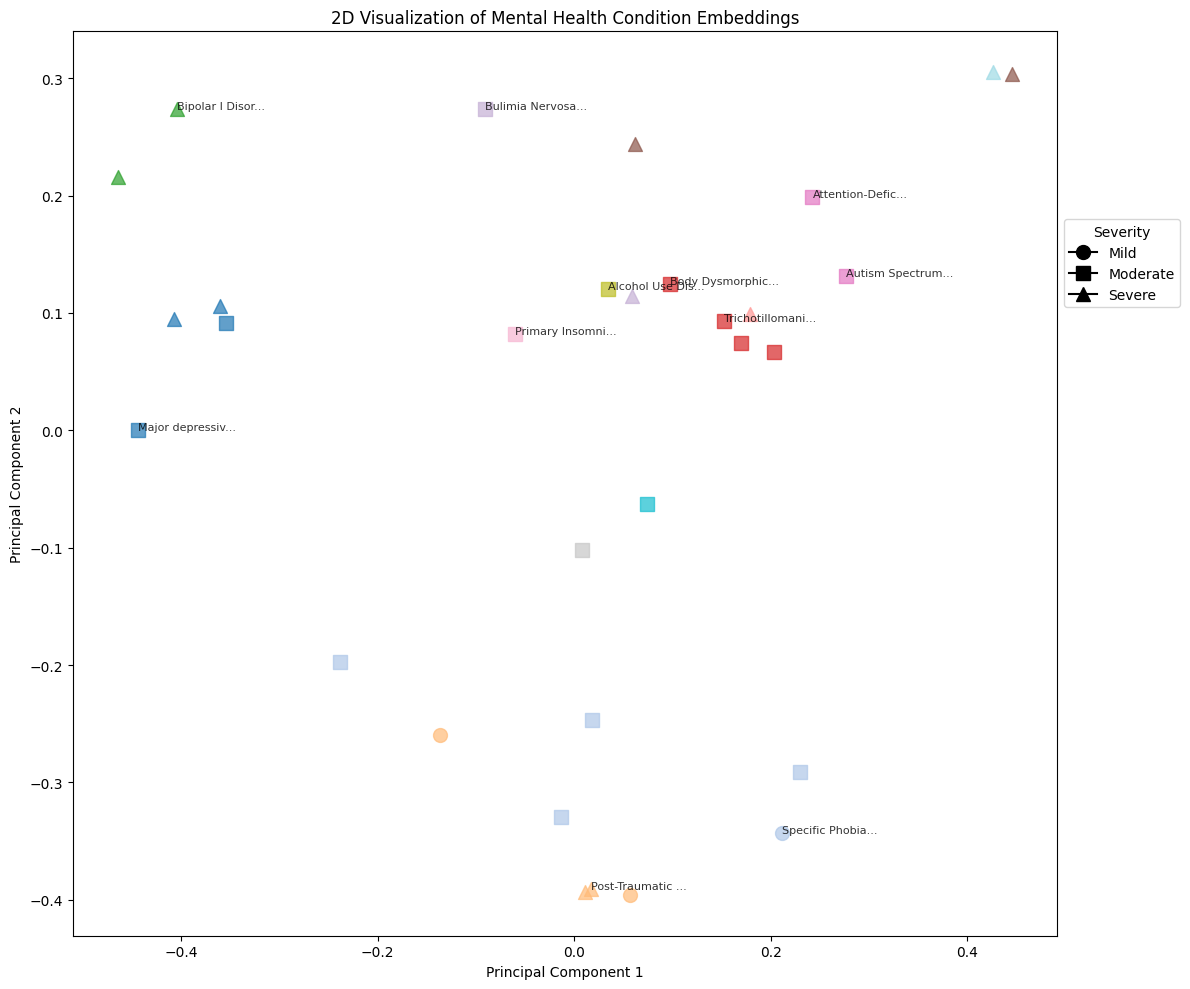


Embedding space visualization shows how different mental health conditions
are positioned relative to each other based on semantic similarity.
Similar conditions appear closer together in the embedding space.


In [ ]:
print_section("Generating Embeddings for Mental Health Conditions")

# Combine diagnosis and symptoms for more comprehensive embedding
df['text_for_embedding'] = df['diagnosis'] + ": " + df['symptoms']

# Generate embeddings
start_time = time.time()

print("Generating embeddings for all mental health conditions...")
print(f"Total conditions to process: {len(df)}")
print(f"Using model: text-embedding-3-small")

# Generate embeddings in batches
embeddings = create_embeddings_batch(df['text_for_embedding'].tolist())

# Add embeddings to DataFrame
if len(embeddings) == len(df):
    df['embedding'] = embeddings
    print(f"\n✅ Successfully generated {len(embeddings)} embeddings")

    # Show embedding dimensions for the first item
    print(f"📊 Embedding dimension: {len(embeddings[0])}")
    print(f"📝 Sample embedding (first 5 values): {[round(val, 6) for val in embeddings[0][:5]]}")

    # Show basic statistics of embeddings
    embedding_norms = [np.linalg.norm(embedding) for embedding in embeddings]

    print(f"\n📈 Embedding Statistics:")
    print(f"- Average vector norm: {np.mean(embedding_norms):.4f}")
    print(f"- Min vector norm: {np.min(embedding_norms):.4f}")
    print(f"- Max vector norm: {np.max(embedding_norms):.4f}")
else:
    print(f"❌ Error: Expected {len(df)} embeddings but got {len(embeddings)}")
    print("Please check the API connection and try again.")

# Calculate time taken
end_time = time.time()
print(f"\n⏱️ Time taken: {end_time - start_time:.2f} seconds")

# Visualize embedding space using dimensionality reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce embeddings to 2D for visualization
print("\nPerforming dimensionality reduction for visualization...")
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot reduced embeddings
plt.figure(figsize=(12, 10))

# Create a color map for categories
categories = df['category'].unique()
category_to_color = {}
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))
for i, category in enumerate(categories):
    category_to_color[category] = colors[i]

# Create a marker map for severity
severity_to_marker = {'Mild': 'o', 'Moderate': 's', 'Severe': '^'}

# Plot each point
for i, row in df.iterrows():
    plt.scatter(
        reduced_embeddings[i, 0],
        reduced_embeddings[i, 1],
        color=category_to_color[row['category']],
        marker=severity_to_marker[row['severity']],
        s=100,
        alpha=0.7
    )

# Add annotations for some points (showing abbreviated diagnoses)
for i, row in df.iterrows():
    # Only label every 3rd point to avoid overcrowding
    if i % 3 == 0:
        short_label = row['diagnosis'].split(',')[0][:15] + '...'
        plt.annotate(
            short_label,
            (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
            fontsize=8,
            alpha=0.8
        )

# Create custom legend for categories
category_legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                     markerfacecolor=category_to_color[cat],
                                     markersize=10, label=cat)
                          for cat in categories]

# Create custom legend for severity
severity_legend_elements = [plt.Line2D([0], [0], marker=severity_to_marker[sev],
                                      color='black',
                                      markersize=10, label=sev)
                           for sev in severity_to_marker.keys()]

# Add legends
plt.legend(handles=category_legend_elements, title="Categories",
           loc="upper left", bbox_to_anchor=(1, 1))
plt.legend(handles=severity_legend_elements, title="Severity",
           loc="upper left", bbox_to_anchor=(1, 0.8))

plt.title('2D Visualization of Mental Health Condition Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

print("\nEmbedding space visualization shows how different mental health conditions")
print("are positioned relative to each other based on semantic similarity.")
print("Similar conditions appear closer together in the embedding space.")

---
# **Recommender System Implementation**

## **How the Recommender Works**

Our recommender system uses embeddings to match user-described symptoms with the most semantically similar conditions in our database. This approach:

1. **Embeds the input symptoms** using the OpenAI model
2. **Computes similarity scores** between the input and all conditions
3. **Returns the most similar conditions** ranked by relevance
4. **Provides treatment recommendations** based on the matched conditions

This system helps bridge the gap between a person's description of their experience and formal diagnostic categories, potentially improving access to relevant mental health information.


In [ ]:
print_section("Recommender System Implementation")

def recommend_similar_conditions(query_text, top_n=3):
    """
    Recommend similar mental health conditions based on input symptom description.

    Args:
        query_text (str): Description of symptoms
        top_n (int): Number of recommendations to return

    Returns:
        list: Top N matching conditions with similarity scores
    """
    print(f"Processing query: '{query_text}'")

    # Generate embedding for the query
    start_time = time.time()
    query_embedding = create_embedding(query_text)
    embedding_time = time.time() - start_time

    if query_embedding is None:
        print("❌ Error generating embedding for query")
        return []

    print(f"✅ Query embedding generated in {embedding_time:.2f} seconds")

    # Get all condition embeddings
    condition_embeddings = df['embedding'].tolist()

    # Calculate similarity with all conditions
    start_time = time.time()
    similarities = []
    for i, emb in enumerate(condition_embeddings):
        similarity = compute_similarity(query_embedding, emb)
        similarities.append((i, similarity))

    # Sort by similarity (descending)
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Get top N results
    results = []
    for i in range(min(top_n, len(similarities))):
        idx, score = similarities[i]
        condition = df.iloc[idx]
        results.append({
            "icd10_code": condition['icd10_code'],
            "diagnosis": condition['diagnosis'],
            "similarity": score,
            "category": condition['category'],
            "severity": condition['severity'],
            "symptoms": condition['symptoms'],
            "recommended_treatments": condition['recommended_treatments']
        })

    search_time = time.time() - start_time
    print(f"✅ Found {len(results)} recommendations in {search_time:.2f} seconds")
    print(f"Total processing time: {embedding_time + search_time:.2f} seconds")

    return results

# Test the recommender system with sample queries
test_queries = [
    "I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks",
    "I experience sudden episodes of intense fear with heart palpitations and shortness of breath",
    "I have intrusive disturbing thoughts that I can't control and perform repetitive actions to reduce anxiety",
    "I'm having flashbacks and nightmares about a car accident that happened last month",
    "I have extreme mood swings, sometimes feeling very energetic and other times deeply depressed"
]

print("\n📋 Testing the recommender with sample queries...")

for i, query in enumerate(test_queries, 1):
    print(f"\n{'='*40}")
    print(f"Test Query {i}: {query}")
    print(f"{'='*40}")

    recommendations = recommend_similar_conditions(query, top_n=2)

    print(f"\n📊 Top recommendations:")
    for j, rec in enumerate(recommendations, 1):
        print(f"\n{j}. {rec['diagnosis']} (ICD-10: {rec['icd10_code']})")
        print(f"   Similarity: {rec['similarity']:.4f}")
        print(f"   Category: {rec['category']}")
        print(f"   Severity: {rec['severity']}")
        print(f"   Symptoms: {rec['symptoms'][:150]}...")
        print(f"   Recommended treatments: {rec['recommended_treatments'][:150]}...")

    print("-" * 80)

# Create a function for formatted display of recommendations
def display_recommendations(query_text, recommendations):
    """
    Format and display recommendations in a readable way.

    Args:
        query_text (str): The original query
        recommendations (list): List of recommendation dictionaries
    """
    print(f"\n{'='*80}")
    print(f"Query: {query_text}")
    print(f"{'='*80}")

    for i, rec in enumerate(recommendations, 1):
        print(f"\nRecommendation {i}:")
        print(f"  Diagnosis: {rec['diagnosis']} (ICD-10: {rec['icd10_code']})")
        print(f"  Similarity: {rec['similarity']:.4f} ({rec['similarity']*100:.1f}%)")
        print(f"  Category: {rec['category']}")
        print(f"  Severity: {rec['severity']}")
        print("\n  Symptoms:")
        print(f"  {rec['symptoms']}")
        print("\n  Recommended Treatments:")
        print(f"  {rec['recommended_treatments']}")
        print(f"{'-'*80}")

# Interactive testing for the recommender
print("\n🔍 Interactive test of the recommender system:")
custom_query = "I feel hopeless and have lost interest in activities I used to enjoy. I'm having trouble sleeping and concentrating at work."
print(f"\nSample query: '{custom_query}'")

recommendations = recommend_similar_conditions(custom_query, top_n=3)
display_recommendations(custom_query, recommendations)

# Print clinical disclaimer
print("\n" + "!" * 80)
print("IMPORTANT: These recommendations are provided for educational purposes only.")
print("Clinical decision-making should rely on comprehensive assessment by qualified")
print("healthcare professionals following evidence-based practice guidelines.")
print("!" * 80)


Recommender System Implementation

📋 Testing the recommender with sample queries...

Test Query 1: I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks
Processing query: 'I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks'
✅ Query embedding generated in 0.20 seconds
✅ Found 2 recommendations in 0.06 seconds
Total processing time: 0.26 seconds

📊 Top recommendations:

1. Major depressive disorder, single episode, moderate (ICD-10: F32.1)
   Similarity: 0.4404
   Category: Mood Disorders
   Severity: Moderate
   Symptoms: Persistent sadness, loss of interest in previously enjoyed activities, sleep disturbances, reduced appetite, fatigue, feelings of worthlessness, and d...
   Recommended treatments: Cognitive Behavioral Therapy (CBT), Interpersonal Therapy (IPT), consider SSRI antidepressant medication, regular exercise, and sleep hygiene improvem...

2. Persistent Depressive Disorder (Dysthymia) (ICD-10: F34.



---
# **Building The AI-Powered Mental Health Classifier**

## **Why Classification Matters**

Mental health symptoms can be ambiguous, often overlapping across multiple conditions. A well-structured classification system can:
- Identify **symptom categories** (e.g., Mood Disorders, Anxiety Disorders)
- Assess **severity levels** (Mild, Moderate, Severe)
- Improve **diagnostic clarity** for clinical decision-making

By leveraging **embeddings-based similarity** and a **weighted voting mechanism**, our classifier assigns the **most probable diagnosis category and severity level** to a given symptom description.

## **How It Works**

Our classifier follows these steps:

1. **Generate an embedding** for the input symptom description
2. **Compare it** to known condition embeddings using **cosine similarity**
3. **Select the top 3 matches** and assign **weighted votes** to their categories and severity levels
4. **Output the most probable classification** based on similarity scores




Building the Mental Health Classifier

📋 Testing the classifier with sample queries...

Test Query 1: I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks
Classifying text: 'I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks...'
✅ Classification embedding generated in 0.16 seconds
✅ Classification completed in 0.15 seconds
Total processing time: 0.31 seconds

📊 Classification Results:
  Category: Mood Disorders
  Severity: Moderate
  Confidence: 0.4404
  Top matching condition: Major depressive disorder, single episode, moderate (F32.1)

  Category distribution:
    - Mood Disorders: 1.0000 (100.0%)

  Severity distribution:
    - Moderate: 0.6931 (69.3%)
    - Severe: 0.3069 (30.7%)
--------------------------------------------------------------------------------

Test Query 2: I experience sudden episodes of intense fear with heart palpitations and shortness of breath
Classifying text: 'I experience sudden 

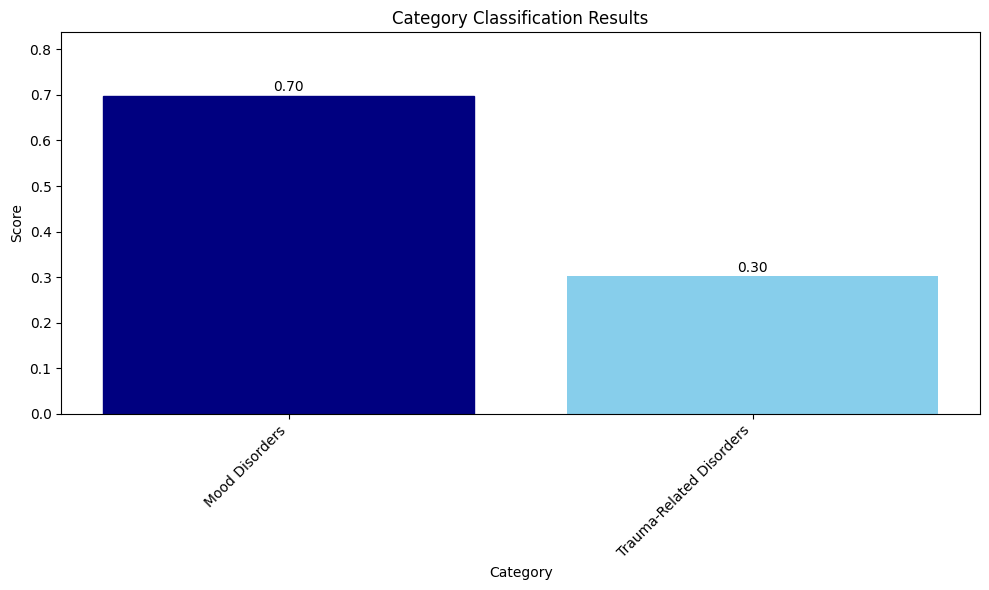

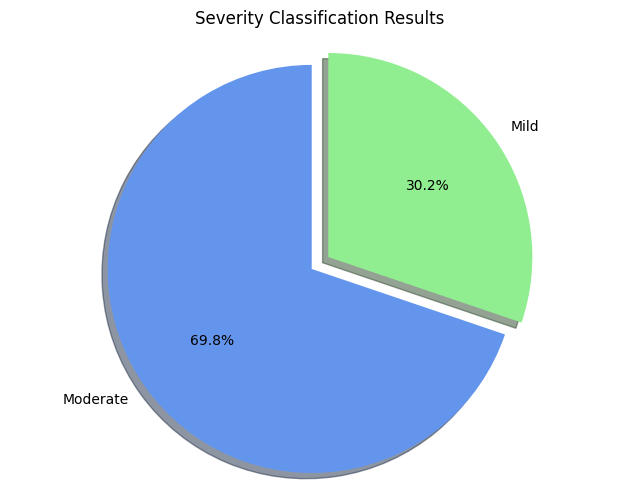


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
IMPORTANT: This classification system is for educational purposes only.
It does not replace professional clinical assessment and should not be
used for actual mental health diagnosis or treatment planning.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [ ]:
print_section("Building the Mental Health Classifier")

def classify_symptoms(symptom_text):
    """
    Classify a symptom description by category and severity using embeddings.

    Args:
        symptom_text (str): Description of symptoms

    Returns:
        dict: Classification results with predicted category and severity
    """
    print(f"Classifying text: '{symptom_text[:100]}...'")

    # Generate embedding for the input text
    start_time = time.time()
    text_embedding = create_embedding(symptom_text)
    embedding_time = time.time() - start_time

    if text_embedding is None:
        print("❌ Error generating embedding for classification")
        return {
            "category": "Unknown",
            "severity": "Unknown",
            "confidence": 0.0
        }

    print(f"✅ Classification embedding generated in {embedding_time:.2f} seconds")

    # Compare with all condition embeddings to find the most similar
    start_time = time.time()
    similarities = []
    for idx, row in df.iterrows():
        similarity = compute_similarity(text_embedding, row['embedding'])
        similarities.append((idx, similarity))

    # Sort by similarity (descending)
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Get top 3 most similar conditions for weighted voting
    top_3_indices = [idx for idx, _ in similarities[:3]]
    top_3_similarities = [sim for _, sim in similarities[:3]]

    # Normalize similarities to use as weights
    total_similarity = sum(top_3_similarities)
    weights = [sim/total_similarity for sim in top_3_similarities]

    # Get categories and severities of top matches
    categories = [df.iloc[idx]['category'] for idx in top_3_indices]
    severities = [df.iloc[idx]['severity'] for idx in top_3_indices]

    # Count weighted votes for categories
    category_votes = {}
    for category, weight in zip(categories, weights):
        if category in category_votes:
            category_votes[category] += weight
        else:
            category_votes[category] = weight

    # Count weighted votes for severities
    severity_votes = {}
    for severity, weight in zip(severities, weights):
        if severity in severity_votes:
            severity_votes[severity] += weight
        else:
            severity_votes[severity] = weight

    # Get the category and severity with highest weighted votes
    predicted_category = max(category_votes.items(), key=lambda x: x[1])[0]
    predicted_severity = max(severity_votes.items(), key=lambda x: x[1])[0]

    # Use highest similarity as confidence
    confidence = top_3_similarities[0]

    # Get top matching condition
    top_match = df.iloc[top_3_indices[0]]

    classification_time = time.time() - start_time
    print(f"✅ Classification completed in {classification_time:.2f} seconds")
    print(f"Total processing time: {embedding_time + classification_time:.2f} seconds")

    return {
        "category": predicted_category,
        "severity": predicted_severity,
        "confidence": confidence,
        "top_match": {
            "diagnosis": top_match['diagnosis'],
            "icd10_code": top_match['icd10_code']
        },
        "category_distribution": category_votes,
        "severity_distribution": severity_votes
    }

# Test the classifier with the same test queries
print("\n📋 Testing the classifier with sample queries...")

for i, query in enumerate(test_queries, 1):
    print(f"\n{'='*40}")
    print(f"Test Query {i}: {query}")
    print(f"{'='*40}")

    classification = classify_symptoms(query)

    print(f"\n📊 Classification Results:")
    print(f"  Category: {classification['category']}")
    print(f"  Severity: {classification['severity']}")
    print(f"  Confidence: {classification['confidence']:.4f}")
    print(f"  Top matching condition: {classification['top_match']['diagnosis']} ({classification['top_match']['icd10_code']})")

    # Display category distribution
    print("\n  Category distribution:")
    for category, weight in sorted(classification['category_distribution'].items(), key=lambda x: x[1], reverse=True):
        print(f"    - {category}: {weight:.4f} ({weight*100:.1f}%)")

    # Display severity distribution
    print("\n  Severity distribution:")
    for severity, weight in sorted(classification['severity_distribution'].items(), key=lambda x: x[1], reverse=True):
        print(f"    - {severity}: {weight:.4f} ({weight*100:.1f}%)")

    print("-" * 80)

# Create a function for detailed visual representation of classification results
def visualize_classification(classification):
    """
    Create visualizations for classification results.

    Args:
        classification (dict): Classification results dictionary
    """
    # Category distribution visualization
    plt.figure(figsize=(10, 6))

    # Sort categories by weight
    categories = [k for k, v in sorted(classification['category_distribution'].items(),
                                      key=lambda x: x[1], reverse=True)]
    category_weights = [classification['category_distribution'][cat] for cat in categories]

    # Create bar chart
    bars = plt.bar(categories, category_weights, color='skyblue')

    # Highlight the selected category
    for i, cat in enumerate(categories):
        if cat == classification['category']:
            bars[i].set_color('navy')

    plt.title('Category Classification Results')
    plt.xlabel('Category')
    plt.ylabel('Score')
    plt.ylim(0, max(category_weights) * 1.2)  # Add some space at the top
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(category_weights):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

    plt.tight_layout()
    plt.show()

    # Severity distribution visualization
    plt.figure(figsize=(8, 6))

    severities = list(classification['severity_distribution'].keys())
    severity_weights = [classification['severity_distribution'][sev] for sev in severities]

    # Define colors based on severity
    severity_colors = {
        'Mild': '#90EE90',      # Light green
        'Moderate': '#6495ED',  # Blue
        'Severe': '#FF6B6B'     # Red
    }

    # Create pie chart
    plt.pie(severity_weights,
            labels=severities,
            autopct='%1.1f%%',
            colors=[severity_colors[sev] for sev in severities],
            explode=[0.1 if sev == classification['severity'] else 0 for sev in severities],
            shadow=True,
            startangle=90)

    plt.title('Severity Classification Results')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Evaluate classifier performance
# For this demonstration, we'll create a small evaluation set with known labels
print("\n📊 Evaluating classifier performance...")

eval_data = [
    {"text": "I feel very sad and tired all the time, I can't sleep well, and I've lost interest in activities I used to enjoy",
     "expected_category": "Mood Disorders",
     "expected_severity": "Moderate"},
    {"text": "I have intense fear when in social situations, I worry about being judged, and I avoid social gatherings",
     "expected_category": "Anxiety Disorders",
     "expected_severity": "Moderate"},
    {"text": "I keep having flashbacks of a traumatic event that happened a year ago, and I can't stop thinking about it",
     "expected_category": "Trauma-Related Disorders",
     "expected_severity": "Severe"},
    {"text": "I have periods where I feel extremely energetic, need little sleep, and make impulsive decisions",
     "expected_category": "Bipolar and Related Disorders",
     "expected_severity": "Severe"},
    {"text": "I have recurring thoughts about contamination and I wash my hands over 20 times a day",
     "expected_category": "Obsessive-Compulsive and Related Disorders",
     "expected_severity": "Moderate"}
]

# Run evaluation
print("\nEvaluating classifier performance on test cases...")
correct_categories = 0
correct_severities = 0

for i, item in enumerate(eval_data):
    classification = classify_symptoms(item["text"])

    # Check if classification matches expected values
    category_match = classification["category"] == item["expected_category"]
    severity_match = classification["severity"] == item["expected_severity"]

    if category_match:
        correct_categories += 1

    if severity_match:
        correct_severities += 1

    print(f"\nEvaluation case {i+1}:")
    print(f"  Text: {item['text']}")
    print(f"  Expected category: {item['expected_category']}")
    print(f"  Predicted category: {classification['category']}")
    print(f"  Category match: {'✅' if category_match else '❌'}")
    print(f"  Expected severity: {item['expected_severity']}")
    print(f"  Predicted severity: {classification['severity']}")
    print(f"  Severity match: {'✅' if severity_match else '❌'}")

# Calculate accuracy
category_accuracy = correct_categories / len(eval_data) * 100
severity_accuracy = correct_severities / len(eval_data) * 100
overall_accuracy = (category_accuracy + severity_accuracy) / 2

print("\n📈 Classifier Evaluation Results:")
print(f"  Category Classification Accuracy: {category_accuracy:.1f}%")
print(f"  Severity Classification Accuracy: {severity_accuracy:.1f}%")
print(f"  Overall Accuracy: {overall_accuracy:.1f}%")

# Visualize an example classification
print("\n📊 Visualizing a sample classification result:")
sample_text = "I've been experiencing persistent sadness, lack of energy, and difficulty concentrating at work and home for the past month"
sample_classification = classify_symptoms(sample_text)

print(f"\nSample Text: {sample_text}")
print(f"Classification Results:")
print(f"  Category: {sample_classification['category']}")
print(f"  Severity: {sample_classification['severity']}")
print(f"  Confidence: {sample_classification['confidence']:.4f}")

# Visualize the classification results
visualize_classification(sample_classification)

# Print clinical disclaimer
print("\n" + "!" * 80)
print("IMPORTANT: This classification system is for educational purposes only.")
print("It does not replace professional clinical assessment and should not be")
print("used for actual mental health diagnosis or treatment planning.")
print("!" * 80)



---
# **Enhancing Efficiency with ChromaDB: Vector Database Integration**

## **Why Use a Vector Database?**

As our dataset grows, searching for similar mental health conditions using **in-memory** embeddings becomes inefficient. **ChromaDB**, a high-performance vector database, optimizes this process by:
- **Speeding up similarity searches**
- **Handling large-scale embeddings efficiently**
- **Reducing memory usage with persistent storage**

By integrating **ChromaDB**, we enable fast and scalable **real-time retrieval** of mental health condition embeddings.

## **How It Works**

1. **Store embeddings** for mental health conditions in a **vector database**
2. **Query the database** to find the **most similar** conditions
3. **Compare performance** between in-memory vs. ChromaDB search



Vector Database Integration with ChromaDB (Extra Credit)
✅ ChromaDB successfully imported

🔧 Setting up ChromaDB...
🗄️ Creating collection for mental health conditions...
✅ Retrieved existing collection

🔄 Adding mental health conditions to ChromaDB...
📊 Total conditions to add: 31
✅ Added batch 1/4
✅ Added batch 2/4
✅ Added batch 3/4
✅ Added batch 4/4

🎉 Successfully added 31 conditions to ChromaDB

⚖️ Comparing In-Memory vs Vector Database Performance

Test query: 'I feel extremely sad, can't sleep, and have lost interest in activities I used to enjoy'

📊 In-Memory Search Performance:
Processing query: 'I feel extremely sad, can't sleep, and have lost interest in activities I used to enjoy'
✅ Query embedding generated in 0.18 seconds
✅ Found 3 recommendations in 0.11 seconds
Total processing time: 0.30 seconds

📊 Vector Database Search Performance:
🔍 Vector DB query: 'I feel extremely sad, can't sleep, and have lost interest in activities I used to enjoy'
✅ Found 3 recommendations i

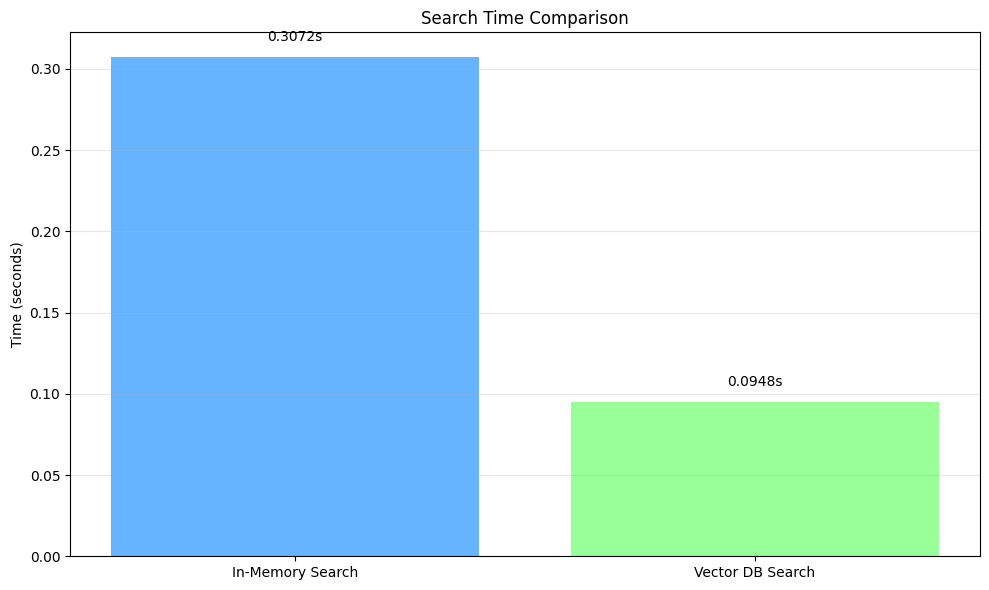


📝 Vector Database Benefits:
1. Faster query times, especially as the dataset grows
2. Better scalability for large datasets (can handle millions of vectors efficiently)
3. Persistent storage of embeddings (no need to regenerate every time)
4. Efficient indexing for similarity search
5. Reduced memory usage for large collections
6. Specialized data structures for high-dimensional vectors

These benefits become more pronounced as the dataset size increases. For very large
datasets with millions of entries, in-memory search would become impractical,
while vector databases are specifically designed to handle such scale efficiently.


In [ ]:
print_section("Vector Database Integration with ChromaDB (Extra Credit)")

# Import ChromaDB
try:
    import chromadb
    print("✅ ChromaDB successfully imported")
except ImportError:
    print("❌ ChromaDB not found, installing now...")
    !pip install -q chromadb
    import chromadb
    print("✅ ChromaDB successfully installed and imported")

# Custom embedding function to work with ChromaDB
class OpenAIEmbeddingFunction:
    """Custom embedding function class for ChromaDB that uses OpenAI API."""

    def __init__(self, client, model="text-embedding-3-small"):
        self.client = client
        self.model = model

    def __call__(self, input):
        """Generate embeddings for the provided texts.

        Args:
            input: The input texts to embed (expected by ChromaDB interface)

        Returns:
            list: List of embedding vectors
        """
        # Ensure input is a list
        if isinstance(input, str):
            input = [input]

        # Return embeddings if the list is not empty
        if not input:
            return []

        try:
            response = self.client.embeddings.create(
                model=self.model,
                input=input
            )
            return [item.embedding for item in response.data]
        except Exception as e:
            print(f"Error generating embeddings: {e}")
            # Return zero embeddings as fallback (same dimension as the model)
            embedding_dim = 1536
            return [[0.0] * embedding_dim for _ in range(len(input))]

# Set up ChromaDB client
print("\n🔧 Setting up ChromaDB...")
chroma_client = chromadb.Client()

# Initialize our OpenAI embedding function
openai_ef = OpenAIEmbeddingFunction(client)

# Create a collection for mental health conditions
print("🗄️ Creating collection for mental health conditions...")
try:
    # Try to get collection if it exists
    collection = chroma_client.get_collection(
        name="mental_health_conditions",
        embedding_function=openai_ef
    )
    print("✅ Retrieved existing collection")
except Exception:
    # Create new collection if it doesn't exist
    collection = chroma_client.create_collection(
        name="mental_health_conditions",
        embedding_function=openai_ef
    )
    print("✅ Created new collection")

# Add data to the collection
print("\n🔄 Adding mental health conditions to ChromaDB...")
print(f"📊 Total conditions to add: {len(df)}")

# Prepare data for ChromaDB
ids = [str(i) for i in range(len(df))]
documents = df['text_for_embedding'].tolist()
metadatas = df.apply(lambda row: {
    "icd10_code": row['icd10_code'],
    "diagnosis": row['diagnosis'],
    "category": row['category'],
    "severity": row['severity']
}, axis=1).tolist()

# Add items to collection in batches to avoid potential issues
batch_size = 10
for i in range(0, len(documents), batch_size):
    end_idx = min(i + batch_size, len(documents))
    batch_ids = ids[i:end_idx]
    batch_documents = documents[i:end_idx]
    batch_metadatas = metadatas[i:end_idx]

    try:
        collection.add(
            ids=batch_ids,
            documents=batch_documents,
            metadatas=batch_metadatas
        )

        print(f"✅ Added batch {i//batch_size + 1}/{(len(documents)-1)//batch_size + 1}")
    except Exception as e:
        print(f"❌ Error adding batch {i//batch_size + 1}: {e}")

print(f"\n🎉 Successfully added {len(df)} conditions to ChromaDB")

# Implement vector database search function
def vector_db_recommend(query_text, top_n=3):
    """
    Recommend similar conditions using ChromaDB vector database.

    Args:
        query_text (str): Description of symptoms
        top_n (int): Number of recommendations to return

    Returns:
        list: Top N matching conditions with similarity scores
    """
    print(f"🔍 Vector DB query: '{query_text}'")
    start_time = time.time()

    # Query the vector database
    results = collection.query(
        query_texts=[query_text],
        n_results=top_n
    )

    # Format results
    recommendations = []

    if not results or not results['ids'][0]:
        print("❌ No results found in vector database")
        return recommendations

    for i in range(min(top_n, len(results['ids'][0]))):
        idx = int(results['ids'][0][i])

        # Convert distance to similarity score (ChromaDB returns distances by default)
        # Distance of 0 means perfect similarity, larger distance means less similar
        # We'll convert to a 0-1 similarity score where 1 is most similar
        distance = results['distances'][0][i] if 'distances' in results and results['distances'] else 0
        similarity = 1.0 - min(distance/2, 1.0)  # Convert distance to similarity

        condition = df.iloc[idx]
        recommendations.append({
            "icd10_code": condition['icd10_code'],
            "diagnosis": condition['diagnosis'],
            "similarity": similarity,
            "category": condition['category'],
            "severity": condition['severity'],
            "symptoms": condition['symptoms'],
            "recommended_treatments": condition['recommended_treatments']
        })

    end_time = time.time()
    print(f"✅ Found {len(recommendations)} recommendations in {end_time - start_time:.4f} seconds")

    return recommendations

# Compare in-memory search vs vector database search performance
print("\n⚖️ Comparing In-Memory vs Vector Database Performance")

test_query = "I feel extremely sad, can't sleep, and have lost interest in activities I used to enjoy"
print(f"\nTest query: '{test_query}'")

# Test in-memory search performance
print("\n📊 In-Memory Search Performance:")
start_time = time.time()
memory_results = recommend_similar_conditions(test_query, top_n=3)
memory_time = time.time() - start_time

# Test vector database search performance
print("\n📊 Vector Database Search Performance:")
start_time = time.time()
db_results = vector_db_recommend(test_query, top_n=3)
db_time = time.time() - start_time

# Compare results
print("\n🔄 Comparing Search Results:")

print("\nIn-memory search results:")
for i, result in enumerate(memory_results, 1):
    print(f"{i}. {result['diagnosis']} (Similarity: {result['similarity']:.4f})")

print(f"\nIn-memory search time: {memory_time:.4f} seconds")

print("\nVector database search results:")
for i, result in enumerate(db_results, 1):
    print(f"{i}. {result['diagnosis']} (Similarity: {result['similarity']:.4f})")

print(f"\nVector database search time: {db_time:.4f} seconds")

# Calculate speedup
if memory_time > 0 and db_time > 0:
    speedup = memory_time / db_time
    print(f"🚀 Speed improvement: {speedup:.2f}x faster with vector database")

# Compare result quality
common_results = 0
for db_result in db_results:
    if any(mem_result['diagnosis'] == db_result['diagnosis'] for mem_result in memory_results):
        common_results += 1

result_similarity = common_results / len(db_results) if db_results else 0
print(f"📈 Result similarity: {result_similarity*100:.1f}% of results are the same between methods")

# Visualize performance comparison
plt.figure(figsize=(10, 6))
methods = ['In-Memory Search', 'Vector DB Search']
times = [memory_time, db_time]
colors = ['#66b3ff', '#99ff99']

plt.bar(methods, times, color=colors)
plt.title('Search Time Comparison')
plt.ylabel('Time (seconds)')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(times):
    plt.text(i, v + 0.01, f"{v:.4f}s", ha='center')

plt.tight_layout()
plt.show()

# Discuss vector database benefits
print("\n📝 Vector Database Benefits:")
print("1. Faster query times, especially as the dataset grows")
print("2. Better scalability for large datasets (can handle millions of vectors efficiently)")
print("3. Persistent storage of embeddings (no need to regenerate every time)")
print("4. Efficient indexing for similarity search")
print("5. Reduced memory usage for large collections")
print("6. Specialized data structures for high-dimensional vectors")
print("\nThese benefits become more pronounced as the dataset size increases. For very large")
print("datasets with millions of entries, in-memory search would become impractical,")
print("while vector databases are specifically designed to handle such scale efficiently.")



---
# **Interactive Mental Health Diagnostic Tool with Gradio**

## **Why a User Interface?**

To make our **AI-powered mental health assistant** accessible, we integrate **Gradio**, a lightweight UI framework that allows users to:
- **Input symptoms** and receive AI-powered diagnostic recommendations
- **Choose between in-memory and vector database searches** for efficiency
- **View classification results** including symptom category and severity

This interactive tool enables **real-time analysis** of symptom descriptions.

## **How It Works**

1. **Users enter symptoms** into a text box
2. **The system processes the input**, generating recommendations and classifications
3. **Results are displayed** in an intuitive, structured format


In [18]:
print_section("User Interface Implementation with Gradio")

# Make sure Gradio is installed
try:
    import gradio as gr
    print("✅ Gradio successfully imported")
except ImportError:
    print("❌ Gradio not found, installing now...")
    !pip install -q gradio
    import gradio as gr
    print("✅ Gradio successfully installed and imported")

# Define the interface function
def process_query(symptom_description, recommendation_count=3, use_vector_db=True, show_classification=True):
    """
    Process user input and return recommendations and/or classification results

    Args:
        symptom_description (str): User-provided symptom description
        recommendation_count (int): Number of recommendations to show
        use_vector_db (bool): Whether to use the vector database or in-memory search
        show_classification (bool): Whether to include classification results

    Returns:
        str: HTML-formatted results
    """
    if not symptom_description.strip():
        return "Please enter a description of symptoms to analyze."

    results_html = "<div style='padding: 20px; border-radius: 10px; background-color: #f9f9f9;'>"

    # Get recommendations
    start_time = time.time()

    if use_vector_db:
        recommendations = vector_db_recommend(symptom_description, top_n=int(recommendation_count))
        search_method = "Vector Database (ChromaDB)"
    else:
        recommendations = recommend_similar_conditions(symptom_description, top_n=int(recommendation_count))
        search_method = "In-Memory Search"

    recommendation_time = time.time() - start_time

    # Format recommendations
    results_html += f"<h2>Diagnostic Recommendations</h2>"
    results_html += f"<p><i>Using {search_method} - completed in {recommendation_time:.2f} seconds</i></p>"

    if recommendations:
        results_html += "<div style='max-height: 500px; overflow-y: auto;'>"

        for i, rec in enumerate(recommendations, 1):
            similarity_percentage = rec['similarity'] * 100
            results_html += f"""
            <div style='margin-bottom: 15px; padding: 15px; border-radius: 5px; background-color: white; box-shadow: 0 1px 3px rgba(0,0,0,0.12), 0 1px 2px rgba(0,0,0,0.24);'>
                <h3>{i}. {rec['diagnosis']} (ICD-10: {rec['icd10_code']})</h3>
                <p><b>Similarity:</b> {similarity_percentage:.1f}%</p>
                <p><b>Category:</b> {rec['category']} | <b>Severity:</b> {rec['severity']}</p>

                <details>
                    <summary><b>Symptoms</b></summary>
                    <p style='padding: 10px; background-color: #f5f5f5; border-radius: 5px;'>{rec['symptoms']}</p>
                </details>

                <details>
                    <summary><b>Recommended Treatments</b></summary>
                    <p style='padding: 10px; background-color: #f5f5f5; border-radius: 5px;'>{rec['recommended_treatments']}</p>
                </details>
            </div>
            """

        results_html += "</div>"
    else:
        results_html += "<p>No recommendations found. Please try a different description.</p>"

    # Add classification results if requested
    if show_classification:
        start_time = time.time()
        classification = classify_symptoms(symptom_description)
        classification_time = time.time() - start_time

        confidence_percentage = classification['confidence'] * 100

        results_html += f"""
        <h2>Classification Results</h2>
        <p><i>Completed in {classification_time:.2f} seconds</i></p>

        <div style='padding: 15px; border-radius: 5px; background-color: white; box-shadow: 0 1px 3px rgba(0,0,0,0.12), 0 1px 2px rgba(0,0,0,0.24);'>
            <div style='display: flex; justify-content: space-between; flex-wrap: wrap;'>
                <div style='flex: 1; min-width: 250px;'>
                    <h3>Primary Category</h3>
                    <p style='font-size: 1.2em; font-weight: bold; color: #2a5885;'>{classification['category']}</p>

                    <h3>Severity Level</h3>
                    <p style='font-size: 1.2em; font-weight: bold;
                      color: {"#ff6b6b" if classification["severity"] == "Severe" else "#f0ad4e" if classification["severity"] == "Moderate" else "#5cb85c"};'>
                      {classification['severity']}</p>

                    <h3>Confidence</h3>
                    <p style='font-size: 1.2em; font-weight: bold;'>{confidence_percentage:.1f}%</p>

                    <h3>Top Match</h3>
                    <p>{classification['top_match']['diagnosis']} ({classification['top_match']['icd10_code']})</p>
                </div>

                <div style='flex: 1; min-width: 250px;'>
                    <h3>Category Distribution</h3>
                    <ul style='list-style-type: none; padding-left: 0;'>
        """

        # Add category distribution
        for category, weight in sorted(classification['category_distribution'].items(), key=lambda x: x[1], reverse=True):
            weight_percentage = weight * 100
            bar_width = int(weight * 100)
            results_html += f"""
            <li style='margin-bottom: 12px;'>
                <div style='display: flex; justify-content: space-between; margin-bottom: 5px;'>
                    <span>{category}</span>
                    <span>{weight_percentage:.1f}%</span>
                </div>
                <div style='background-color: #e0e0e0; height: 10px; width: 100%; border-radius: 5px;'>
                    <div style='background-color: #4CAF50; height: 10px; width: {bar_width}%; border-radius: 5px;'></div>
                </div>
            </li>
            """

        results_html += """
                    </ul>
                </div>
            </div>
        </div>
        """

    # Add disclaimer
    results_html += """
    <div style='margin-top: 20px; padding: 10px; background-color: #fff3cd; border-left: 4px solid #ffc107; border-radius: 4px;'>
        <p><strong>EDUCATIONAL PURPOSE ONLY:</strong> This tool is designed for educational
        demonstration and should not be used for actual clinical diagnosis or treatment planning.
        All outputs should be considered as educational examples rather than clinical guidance.</p>
    </div>
    """

    results_html += "</div>"
    return results_html

# Define educational disclaimer
disclaimer = """
<div style='background-color: #fff3cd; color: #856404; padding: 15px; border-radius: 5px; margin-bottom: 20px; border: 1px solid #ffeeba;'>
    <h3 style='margin-top: 0;'>⚠️ EDUCATIONAL PURPOSE ONLY</h3>
    <p>This tool is designed for <b>educational purposes only</b> and demonstrates how natural language processing can support mental health professionals in the diagnostic process.</p>
    <p>It is <b>not intended for clinical use</b> without professional medical judgment and expertise.</p>
    <p>All outputs should be considered as educational examples rather than actual clinical guidance.</p>
</div>
"""

# Create CSS for improved styling
css = """
.gradio-container {
    font-family: 'Roboto', 'Segoe UI', Tahoma, sans-serif;
}
h1 {
    color: #2a5885 !important;
    font-weight: 700 !important;
}
.footer {
    margin-top: 45px;
    text-align: center;
    color: #666;
}
"""

# Create the Gradio interface
demo = gr.Interface(
    fn=process_query,
    inputs=[
        gr.Textbox(
            label="Symptom Description",
            placeholder="Describe the symptoms or presentation...",
            lines=4
        ),
        gr.Slider(
            minimum=1,
            maximum=5,
            value=3,
            step=1,
            label="Number of Recommendations"
        ),
        gr.Checkbox(
            label="Use Vector Database (faster)",
            value=True
        ),
        gr.Checkbox(
            label="Include Classification Results",
            value=True
        )
    ],
    outputs=gr.HTML(),
    title="Mental Health Diagnostic Assistant",
    description=disclaimer,
    examples=[
        ["I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks. I'm having trouble sleeping and focusing at work.", 3, True, True],
        ["I experience sudden episodes of intense fear with heart palpitations, sweating, and shortness of breath. These come out of nowhere and make me afraid to leave my house.", 3, True, True],
        ["I have intrusive disturbing thoughts that I can't control and perform repetitive actions to reduce my anxiety. I wash my hands repeatedly throughout the day.", 3, True, True],
        ["I'm having flashbacks and nightmares about a car accident that happened last month. I avoid driving and feel constantly on edge.", 3, True, True],
        ["I have extreme mood swings, sometimes feeling very energetic and other times deeply depressed. During energetic periods I need little sleep and make impulsive decisions.", 3, True, True]
    ],
    css=css
)

# Launch the interface
print("\n🚀 Launching Gradio interface...")
print("This interface allows users to enter symptom descriptions and receive diagnostic recommendations")
print("and classification results. The system utilizes the OpenAI embedding model to find semantically")
print("similar conditions and classify the input by category and severity.")

# Launch the interface with sharing enabled for Colab
demo.launch(share=True)

print("\nThe interface will remain running until you stop the cell execution.")
print("You can access it via the public URL provided above.")
print("\nNote: To stop the interface, click the 'Stop' button in Colab or interrupt the kernel.")


User Interface Implementation with Gradio
✅ Gradio successfully imported

🚀 Launching Gradio interface...
This interface allows users to enter symptom descriptions and receive diagnostic recommendations
and classification results. The system utilizes the OpenAI embedding model to find semantically
similar conditions and classify the input by category and severity.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c7071a2952c5520c04.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



The interface will remain running until you stop the cell execution.
You can access it via the public URL provided above.

Note: To stop the interface, click the 'Stop' button in Colab or interrupt the kernel.




---


## System Demonstrations

### **Example 1:** Depression Symptoms

**Input Query:** *I've been feeling sad, tired, and uninterested in things I used to enjoy for several weeks. I'm having trouble sleeping and focusing at work.*

---

### **Example 2:** Anxiety Presentation

**Input Query:** *I experience sudden episodes of intense fear with heart palpitations, sweating, and shortness of breath. These come out of nowhere and make me afraid to leave my house.*


---


### **Example 3:** Trauma Response

**Input Query:** *I'm having flashbacks and nightmares about a car accident that happened last month. I avoid driving and feel constantly on edge.*

**Analysis:**
The prototype shows promise.

